In [1]:
# Cargamos a nuestro entorno de trabajo las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargamos la informacion del CSV en una variable llamada data
# https://www.kaggle.com/datasets/kandij/diabetes-dataset
# lectura de datos en Python
train = pd.read_csv('D:/ejercios/framingham.csv')

In [51]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0,0.0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2.0,0,0,0.0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1.0,1,20,0.0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3.0,1,30,0.0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3.0,1,23,0.0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [52]:
train[['glucose', 'age']].head()

,glucose,age
0,77,39
1,76,46
2,70,48
3,103,61
4,85,46


<Axes: xlabel='glucose', ylabel='age'>

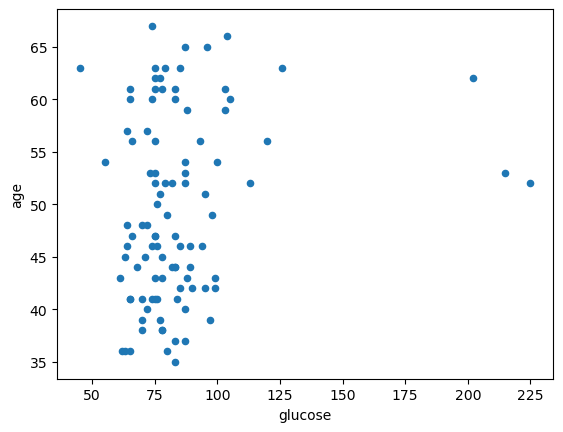

In [3]:
#Realizo la grafica de dispersion
train[['glucose','age']].plot.scatter(x='glucose',y='age')

In [28]:
# pruebas de parametro
w = 0.09
b = -3.6

In [10]:
# despues de hacer el modelos (se explica más adelante)
# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]

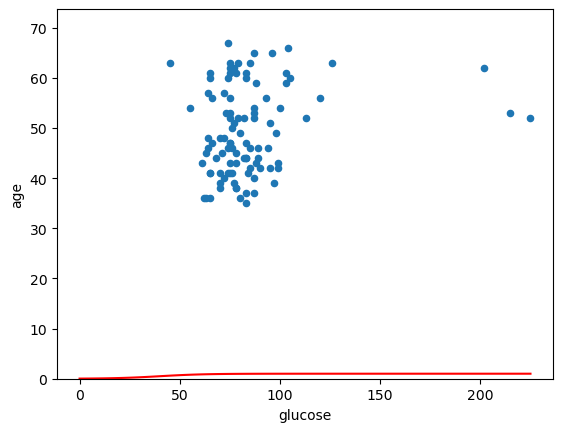

In [54]:
# puntos de la recta
x = np.linspace(0,train['glucose'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))
# grafica de la recta
train.plot.scatter(x='glucose',y='age')
plt.plot(x, y, '-r')
plt.ylim(0,train['age'].max()*1.1)
# plt.grid()
plt.show()

In [55]:
# calculo de las predicciones
train['sigmoid'] = 1/(1+np.exp(-(train['glucose']*w+b)))
# calculo de la funcion de error
train['loss_xi'] = -train['glucose']*np.log(train['sigmoid'])-(1-train['glucose'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

-396.0769812367658

In [13]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b

In [56]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [44]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [57]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['glucose']*df['w']+df['b'])))
    train['loss_xi'] = -train['glucose']*np.log(train['sigmoid'])-(1-train['glucose'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [60]:
df['error'] = df.apply(sum_error_df, axis=1)

In [61]:
df.sort_values(by=['error']).head()

,w,b,error
999,0.14,-3.01,-832.073719
998,0.14,-3.02,-831.240303
997,0.14,-3.03,-830.407315
996,0.14,-3.04,-829.573097
995,0.14,-3.05,-828.739286


In [62]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [63]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,-52.644211,-53.482581,-54.320929,-55.159254,-55.997557,-56.835838,-57.674097,-58.512334,-59.350549,-60.188742,...,-128.010984,-128.847457,-129.683911,-130.520347,-131.356763,-132.193161,-133.029540,-133.865900,-134.702242,-135.538565
0.06,-130.300745,-131.137467,-131.974171,-132.810855,-133.647520,-134.484166,-135.320793,-136.157400,-136.993989,-137.830560,...,-205.536030,-206.371280,-207.206516,-208.041740,-208.876950,-209.712148,-210.547333,-211.382505,-212.217665,-213.052812
0.07,-207.841501,-208.676959,-209.512403,-210.347833,-211.183249,-212.018652,-212.854041,-213.689417,-214.524779,-215.360128,...,-282.985141,-283.819621,-284.654092,-285.488556,-286.323012,-287.157460,-287.991900,-288.826333,-289.660758,-290.495175
0.08,-285.302560,-286.137187,-286.971805,-287.806415,-288.641016,-289.475608,-290.310191,-291.144766,-291.979333,-292.813891,...,-360.389950,-361.223990,-362.058025,-362.892056,-363.726083,-364.560105,-365.394122,-366.228136,-367.062145,-367.896150
0.09,-362.715262,-363.549396,-364.383526,-365.217650,-366.051769,-366.885884,-367.719993,-368.554097,-369.388196,-370.222290,...,-437.770741,-438.604543,-439.438342,-440.272139,-441.105934,-441.939726,-442.773516,-443.607303,-444.441088,-445.274871


In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

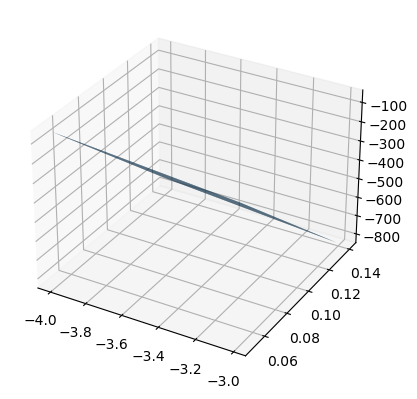

In [65]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

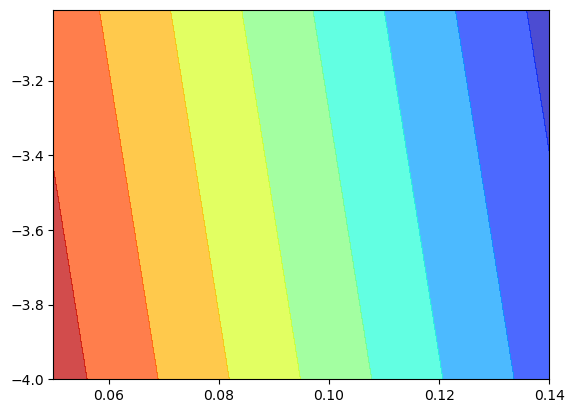

In [66]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [68]:
def delta_j_w(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['glucose']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['age'])*train['glucose']
    derivative = train['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['glucose']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['age'])
    derivative = train['partial_loss'].mean()
    return(derivative) 

In [69]:
w_0 = 0.09
b_0 = -3.57

In [75]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

8.361483672495094 6.12906546820318


In [76]:
# valores optimos de sklearn (más abajo la explicación)
# w = 0.09351691
# b = -3.68596089

In [77]:
from sklearn.linear_model import LinearRegression

# Definir input y output
X_train = np.array(train['glucose']).reshape((-1, 1))
Y_train = np.array(train['age'])

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)

# Imprimir parámetros
print(f"Intercepto (b): {model.intercept_}")
print(f"Pendiente (w): {model.coef_}")


Intercepto (b): 44.047387751708136
Pendiente (w): [0.06434063]


In [ ]:
#El siguiente código que usamos en Python fue una datación de código expuesto en el siguiente link https://youtu.be/BHok3wJpmf0